# Bozner_OCR: Trainingbilder im einheitlichen Format

Dieses Notebook soll zeigen, wie man aus Bildern beliebigen Formats Bilder erzeugt, die alle das gleiche Format haben. In diesem Fall sollen händisch kopierte Bilder von Zahlen in Bilder überführt werden, die 200x200 Pixel gross sind.

Die erforderlichen Packages werden geladen:

In [5]:
import glob
import numpy as np
import matplotlib.pyplot as plt
import cv2
import os

Der Pfad wird angegeben, unter dem die händisch erzeugten Bilder (Eingangsbilder) abgespeichert sind. 
(Das ist natürlich der Pfad auf **meinem** PC.)

In [6]:
data_path = '/Users/Michael/Anaconda3/Jupiter_Notebooks/DigitalScholarship-UB-Bern/Bozner_OCR/Training_Data/'

Man schaut sich die Ordner- und Unterordnerstruktur an:

In [7]:
samples = np.sort(glob.glob(data_path+'*'))
print(samples)

['/Users/Michael/Anaconda3/Jupiter_Notebooks/DigitalScholarship-UB-Bern/Bozner_OCR/Training_Data\\0'
 '/Users/Michael/Anaconda3/Jupiter_Notebooks/DigitalScholarship-UB-Bern/Bozner_OCR/Training_Data\\1'
 '/Users/Michael/Anaconda3/Jupiter_Notebooks/DigitalScholarship-UB-Bern/Bozner_OCR/Training_Data\\2'
 '/Users/Michael/Anaconda3/Jupiter_Notebooks/DigitalScholarship-UB-Bern/Bozner_OCR/Training_Data\\3'
 '/Users/Michael/Anaconda3/Jupiter_Notebooks/DigitalScholarship-UB-Bern/Bozner_OCR/Training_Data\\4'
 '/Users/Michael/Anaconda3/Jupiter_Notebooks/DigitalScholarship-UB-Bern/Bozner_OCR/Training_Data\\5'
 '/Users/Michael/Anaconda3/Jupiter_Notebooks/DigitalScholarship-UB-Bern/Bozner_OCR/Training_Data\\6'
 '/Users/Michael/Anaconda3/Jupiter_Notebooks/DigitalScholarship-UB-Bern/Bozner_OCR/Training_Data\\7'
 '/Users/Michael/Anaconda3/Jupiter_Notebooks/DigitalScholarship-UB-Bern/Bozner_OCR/Training_Data\\8'
 '/Users/Michael/Anaconda3/Jupiter_Notebooks/DigitalScholarship-UB-Bern/Bozner_OCR/Training

Man schaut sich an, wie 5 Bilder aus dem Unterordner 2 aussehen:

In [8]:
files = glob.glob(samples[2]+'/*.png')

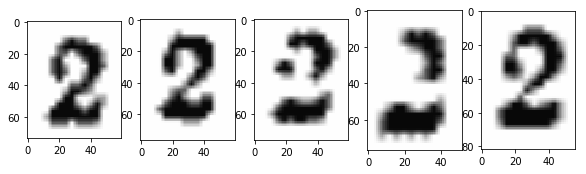

In [9]:
plt.figure(figsize=(20,20))
for i in range(5):
    plt.subplot(1,10,i+1)
    image = cv2.imread(files[i])
    plt.imshow(image)
plt.show()

Man liest zwei Bilder in OpenCV ein und schaut sich deren Format an:

In [10]:
img1 = cv2.imread(data_path + '/' + '2' + '/' + '0.png')
img2 = cv2.imread(data_path + '/' + '2' + '/' + '1.png')

In [11]:
print(img1.shape)
print(img2.shape)

(74, 60, 3)
(77, 60, 3)


Die Bilder haben unterschiedliche Formate:  
74x60 Pixel das eine  
77x60 Pixel das andere.  
Sie bestehen jeweils aus 3 Ebenen, wie es für RGB Bilder typisch ist.

Mit 'cv2.resize' lässt sich das Format des Bildes ändern:

In [12]:
img1_reshaped = cv2.resize(img1,(200, 200))

In [13]:
img1_reshaped.shape

(200, 200, 3)

Jetzt hat Bild 1 das Format 200x200 Pixel.

Mal schauen, wie das Bild im neuen Format aussieht:

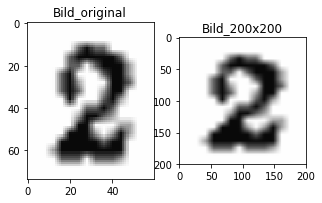

In [14]:
plt.figure(figsize=(5,5))

plt.subplot(1,2,1)
plt.imshow(img1)
plt.title('Bild_original')

plt.subplot(1,2,2)
plt.imshow(img1_reshaped)
plt.title('Bild_200x200')
plt.show()

Wie man sieht, wurde das Bild bei der Formatänderung verzerrt, die Zahl 2 sieht etwas anders aus.  
Wir müssen verhindern, dass so etwas passiert. Unsere Trainingsdaten wären sonst verfälscht.

Hierzu kann man folgendermassen vorgehen:  
- man erzeugt ein weisses Bild im gewünschten Format als Hintergrundbild.
- man plaziert das Eingangsbild in die Mitte dieses Hintergrundbildes.
- man fusioniert beide Bilder und hat somit ein Ausgangsbild im gewünschten Format.

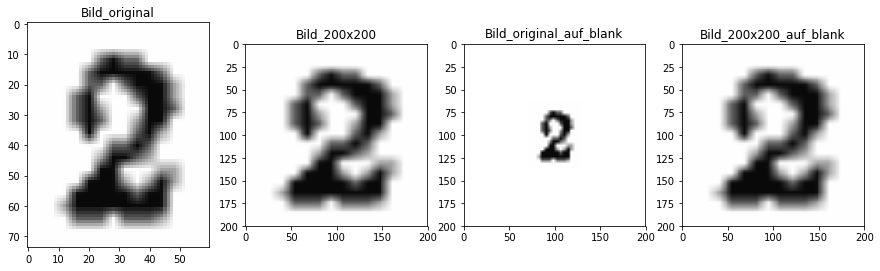

In [15]:
# Höhe und Breite des gewünschten Formates in Pixel:
height, width = (200 , 200)  

#Erstellen des weissen Hintergrundbildes. Dass es weiss ist, legen die Zahlen (255, 255, 255) fest.
blank_image_orig = np.zeros((height, width, 3), np.uint8)
blank_image_orig[:, 0:width] = (255, 255, 255) # (B, G, R)

# Positionierung des Eingangsbildes in die Mitte des Hintergrundbildes:
x_offset = int((width - img1.shape[1])/2)
y_offset = int((height - img1.shape[0])/2)

#Erstellen des Ausgangsbildes. In diesem Fall wird das Original-Eingangsbild (img1) auf das Hintergrundbild plaziert:
blank_image_orig[ y_offset:y_offset+img1.shape[0], x_offset:x_offset+img1.shape[1]] = img1


# Das gleich Prozedere für das verzerrte Eingangsbild (img_reshaped):
blank_image_200x200 = np.zeros((height, width, 3), np.uint8)
blank_image_200x200[:, 0:width] = (255, 255, 255) # (B, G, R)

x_offset = int((width - img1_reshaped.shape[1])/2)
y_offset = int((height - img1_reshaped.shape[0])/2)

blank_image_200x200[ y_offset:y_offset+img1_reshaped.shape[0], x_offset:x_offset+img1_reshaped.shape[1]] = img1_reshaped


# Plotten der Bilder, um zu sehen, was man erreicht hat:
plt.figure(figsize=(15,15))

plt.subplot(1,4,1)
plt.imshow(img1)
plt.title('Bild_original')

plt.subplot(1,4,2)
plt.imshow(img1_reshaped)
plt.title('Bild_200x200')

plt.subplot(1,4,3)
plt.imshow(blank_image_orig)
plt.title('Bild_original_auf_blank')

plt.subplot(1,4,4)
plt.imshow(blank_image_200x200)
plt.title('Bild_200x200_auf_blank')
plt.show()

Wie man sieht, ist es gelungen, das Originalbild (img1) auf ein 200x200 Pixel Hintergrundbild zu plazieren und als neues Bild (Bild_original_auf_blank) abzurufen.

### Automatisierung

Nachdem man weiss, welche Operationen man mit einem einzelnen Bild durchführen muss, um zum gewünschten Ergebnis zu gelangen, möchte man das Prozedere auf alle Eingangsbilder anwenden.

Da man die umformatierten Bilder abspeichern möchte, gibt man einen Ausgangspfad an, d.h. einen Ordner, in dem man die Ausgangsbilder speichert.

In [16]:
path_output = '/Users/Michael/Anaconda3/Jupiter_Notebooks/DigitalScholarship-UB-Bern/Bozner_OCR/Training_Data_Reshape_200x200_Imp/'

Den Ausgangsordner kann man händisch erzeugen oder in Python.  
Hier wird er in Python erzeugt. Auch die erforderlichen Unterordner mit den Namen '0' bis '9' werden erzeugt:

In [17]:
os.mkdir(path_output)
for i in range (0,10):
    os.mkdir(path_output + str(i))

Schliesslich wird die eingangs gezeigte Prozedur auf alle Bilder im Eingangsordner, unter Berücksichtigung der Unterordnerstruktur, durchgeführt:

In [18]:
height, width = (200 , 200)

# Die Methode os.walk erfasst alle Unterordner im Eingangspfad:
for subdir, dirs, files in os.walk(data_path):
    
    # Man führt eine Differenzierung nach Unterordnernamen durch:
    if subdir.endswith('0'):
        
        # Für alle Files im spezifizierten Unterordner werden die angegebenen Operationen durchgeführt:
        for file in files:
            
            # Einlesen der Bilder in OpenCV:
            img0 = cv2.imread(data_path + '0/' + file)
            
            # Durchführung der Prozedur:
            blank_image_0 = np.zeros((height, width, 3), np.uint8)
            blank_image_0[:, 0:width] = (255, 255, 255) # (B, G, R)

            x_offset = int((width - img0.shape[1])/2)
            y_offset = int((height - img0.shape[0])/2)

            blank_image_0[ y_offset:y_offset+img0.shape[0], x_offset:x_offset+img0.shape[1]] = img0
            
            # Abspeichern der Bilder im angegebenen Ausgangspfad und im richtigen Unterordner:
            cv2.imwrite(path_output + '0/' + file, blank_image_0)
    
    # Wiederholung für die restlichen Unterordner:
    elif subdir.endswith('1'):
        for file in files:
            img1 = cv2.imread(data_path + '1/' + file)

            blank_image_1 = np.zeros((height, width, 3), np.uint8)
            blank_image_1[:, 0:width] = (255, 255, 255) # (B, G, R)

            x_offset = int((width - img1.shape[1])/2)
            y_offset = int((height - img1.shape[0])/2)

            blank_image_1[ y_offset:y_offset+img1.shape[0], x_offset:x_offset+img1.shape[1]] = img1
            cv2.imwrite(path_output + '1/' + file, blank_image_1)
            
    elif subdir.endswith('2'):
        for file in files:
            img2 = cv2.imread(data_path + '2/' + file)

            blank_image_2 = np.zeros((height, width, 3), np.uint8)
            blank_image_2[:, 0:width] = (255, 255, 255) # (B, G, R)

            x_offset = int((width - img2.shape[1])/2)
            y_offset = int((height - img2.shape[0])/2)

            blank_image_2[ y_offset:y_offset+img2.shape[0], x_offset:x_offset+img2.shape[1]] = img2
            cv2.imwrite(path_output + '2/' + file, blank_image_2)
            
    elif subdir.endswith('3'):
        for file in files:
            img3 = cv2.imread(data_path + '3/' + file)

            blank_image_3 = np.zeros((height, width, 3), np.uint8)
            blank_image_3[:, 0:width] = (255, 255, 255) # (B, G, R)

            x_offset = int((width - img3.shape[1])/2)
            y_offset = int((height - img3.shape[0])/2)

            blank_image_3[ y_offset:y_offset+img3.shape[0], x_offset:x_offset+img3.shape[1]] = img3
            cv2.imwrite(path_output + '3/' + file, blank_image_3)
            
    elif subdir.endswith('4'):
        for file in files:
            img4 = cv2.imread(data_path + '4/' + file)

            blank_image_4 = np.zeros((height, width, 3), np.uint8)
            blank_image_4[:, 0:width] = (255, 255, 255) # (B, G, R)

            x_offset = int((width - img4.shape[1])/2)
            y_offset = int((height - img4.shape[0])/2)

            blank_image_4[ y_offset:y_offset+img4.shape[0], x_offset:x_offset+img4.shape[1]] = img4
            cv2.imwrite(path_output + '4/' + file, blank_image_4)
            
    elif subdir.endswith('5'):
        for file in files:
            img5 = cv2.imread(data_path + '5/' + file)

            blank_image_5 = np.zeros((height, width, 3), np.uint8)
            blank_image_5[:, 0:width] = (255, 255, 255) # (B, G, R)

            x_offset = int((width - img5.shape[1])/2)
            y_offset = int((height - img5.shape[0])/2)

            blank_image_5[ y_offset:y_offset+img5.shape[0], x_offset:x_offset+img5.shape[1]] = img5
            cv2.imwrite(path_output + '5/' + file, blank_image_5)
            
    elif subdir.endswith('6'):
        for file in files:
            img6 = cv2.imread(data_path + '6/' + file)

            blank_image_6 = np.zeros((height, width, 3), np.uint8)
            blank_image_6[:, 0:width] = (255, 255, 255) # (B, G, R)

            x_offset = int((width - img6.shape[1])/2)
            y_offset = int((height - img6.shape[0])/2)

            blank_image_6[ y_offset:y_offset+img6.shape[0], x_offset:x_offset+img6.shape[1]] = img6
            cv2.imwrite(path_output + '6/' + file, blank_image_6)
            
    elif subdir.endswith('7'):
        for file in files:
            img7 = cv2.imread(data_path + '7/' + file)

            blank_image_7 = np.zeros((height, width, 3), np.uint8)
            blank_image_7[:, 0:width] = (255, 255, 255) # (B, G, R)

            x_offset = int((width - img7.shape[1])/2)
            y_offset = int((height - img7.shape[0])/2)

            blank_image_7[ y_offset:y_offset+img7.shape[0], x_offset:x_offset+img7.shape[1]] = img7
            cv2.imwrite(path_output + '7/' + file, blank_image_7)
            
    elif subdir.endswith('8'):
        for file in files:
            img8 = cv2.imread(data_path + '8/' + file)

            blank_image_8 = np.zeros((height, width, 3), np.uint8)
            blank_image_8[:, 0:width] = (255, 255, 255) # (B, G, R)

            x_offset = int((width - img8.shape[1])/2)
            y_offset = int((height - img8.shape[0])/2)

            blank_image_8[ y_offset:y_offset+img8.shape[0], x_offset:x_offset+img8.shape[1]] = img8
            cv2.imwrite(path_output + '8/' + file, blank_image_8)
    
    elif subdir.endswith('9'):
        for file in files:
            img9 = cv2.imread(data_path + '9/' + file)

            blank_image_9 = np.zeros((height, width, 3), np.uint8)
            blank_image_9[:, 0:width] = (255, 255, 255) # (B, G, R)

            x_offset = int((width - img9.shape[1])/2)
            y_offset = int((height - img9.shape[0])/2)

            blank_image_9[ y_offset:y_offset+img9.shape[0], x_offset:x_offset+img9.shape[1]] = img9
            cv2.imwrite(path_output + '9/' + file, blank_image_9)
    else:
        pass

Bei diesem Vorgehen gibt man die Unterordnerstruktur (0-9) explizit an. Besser wäre es, eine Methode zu finden, bei der man das nicht tun muss.

### Spielwiese

Hier bin ich selber noch nicht so weit. Ihr dürft gerne rumprobieren. :)

In [19]:
path_output_2 = '/Users/Michael/Anaconda3/Jupiter_Notebooks/DigitalScholarship-UB-Bern/Bozner_OCR/Training_Data_Reshape_200x200_Imp_2/'

In [20]:
os.mkdir(path_output_2)
for i in range (0,10):
    os.mkdir(path_output_2 + str(i))

In [21]:
height, width = (200 , 200)

for subdir, dirs, files in os.walk(data_path):
    # Hier würde noch ein Loop kommen, mit dem man über sämtliche Unterordner automatisch iteriert.
        for file in files:
            
            # Man würde die jeweiligen Unterordner automatisch erkennen wollen:
            img = cv2.imread(data_path + '/' + subdir + '/' + file) # Diese Zeile funktioniert aber noch nicht.
            
            blank_image = np.zeros((height, width, 3), np.uint8)
            blank_image[:, 0:width] = (255, 255, 255) # (B, G, R)

            x_offset = int((width - img.shape[1])/2)
            y_offset = int((height - img.shape[0])/2)

            blank_image[ y_offset:y_offset+img.shape[0], x_offset:x_offset+img.shape[1]] = img
            
            # Man würde die bearbeiteten Bilder im Ausgangspfad im richtigen Unterordner speichern wollen.
            cv2.imwrite(path_output_2 + os.sep + subdir + os.sep + file, blank_image) # Auch diese Zeile funktioniert noch nicht

AttributeError: 'NoneType' object has no attribute 'shape'

### Viel Spass und danke für die Hilfe !!!

Code-Source for blank_image:  
https://gist.github.com/uchidama/41d1c0a068f1d36dec2706715a7f17aa